# 1) Regression:
## Choose 4 different methods of regression 
### a) random forest
### b) linear regression
### c) Lasso
### d) kNN


In [1]:
# Basic imports
import sys
import math
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print(sys.executable)

# models for random forest
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

# models for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# models for Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# models for kNN
from sklearn.neighbors import KNeighborsRegressor

# statistic tools
from sklearn import metrics
from statistics import stdev
from sklearn.model_selection import GridSearchCV

# preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7


In [2]:
# Might be good idea to have a function for dataset analysis --> standardized output
# Just a prototype/idea for now
def analyse_dataset(frame, name='not-given'):
    print(f"Analysis of <{name}>")
    print('-'*40)
    print("Info:")
    print(frame.info())
    print('-'*40)
    print("Shape:")
    print(frame.shape)
    print('-'*40)
    print("Index:")
    print(frame.index)
    print('-'*40)
    print("Columns:")
    print(frame.columns)

In [3]:
dataset_name = 'Bias_correction_ucl.csv'
print("Opening: ", dataset_name)
df = pd.read_csv(dataset_name,  sep = ',')#, header = 0)
print(df)

Opening:  Bias_correction_ucl.csv
      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  2013-06-30          28.7          21.4    58.255688   
1         2.0  2013-06-30          31.9          21.6    52.263397   
2         3.0  2013-06-30          31.6          23.3    48.690479   
3         4.0  2013-06-30          32.0          23.4    58.239788   
4         5.0  2013-06-30          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         2

In [4]:
# Quick analysis
print(f"Analysis of <{dataset_name}>")
print('-'*40)
print("Info:")
print(df.info())

print("Columns:")
print(df.columns)

Analysis of <Bias_correction_ucl.csv>
----------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAP

In [5]:
col_dict = {c: i for i, c in enumerate(df.columns)}

## Description of data columns

1. station - used weather station number: 1 to 25 
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30') 
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6 
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9 
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5 
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100 
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5 
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6 
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9 
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4 
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97 
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97 
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98 
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97 
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7 
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6 
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8 
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7 
19. lat - Latitude (Â°): 37.456 to 37.645 
20. lon - Longitude (Â°): 126.826 to 127.135 
21. DEM - Elevation (m): 12.4 to 212.3 
22. Slope - Slope (Â°): 0.1 to 5.2 
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9 
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9 
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
            
def add_RD(df):
    df['RD'] = df.apply(lambda row: row.RS - row.RA, axis = 1) 

## First look on data and information

In [7]:
display_all(df.tail().transpose())
print('#'*40)
display('Some more info')
print('#'*40)
display(df.info())

,7747,7748,7749,7750,7751
station,23,24,25,NaN,NaN
Date,2017-08-30,2017-08-30,2017-08-30,NaN,NaN
Present_Tmax,23.3,23.3,23.2,20,37.6
Present_Tmin,17.1,17.7,17.4,11.3,29.9
LDAPS_RHmin,26.7413,24.0406,22.933,19.7947,98.5247
LDAPS_RHmax,78.8699,77.295,77.2437,58.9363,100
LDAPS_Tmax_lapse,26.3521,27.0102,27.9395,17.625,38.5423
LDAPS_Tmin_lapse,18.7757,18.7335,18.523,14.2726,29.6193
LDAPS_WS,6.14892,6.54282,7.28926,2.88258,21.8576
LDAPS_LH,72.0583,47.2415,9.09003,-13.6032,213.414


########################################


'Some more info'

########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  L

None

# a) Random forest

## Preprocessing for random forest

In [8]:
# Split into train and test
def split_simple(df, n): 
    '''n... number to split at'''
    return df[:n].copy(), df[n:].copy()

In [9]:
df_prep_rf = df
cols_to_drop = ['station', 'Date', 'Next_Tmax']
df_prep_rf = df_prep_rf.drop(cols_to_drop, axis=1)
np.where(np.isnan(df_prep_rf))

(array([ 225,  225,  271, ..., 7682, 7707, 7707]),
 array([ 0,  1,  0, ..., 21,  0,  1]))

In [10]:
# Fix missing values
from sklearn.impute import SimpleImputer
np.where(np.isnan(df_prep_rf))

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_imputed = imp.fit_transform(df_prep_rf)
df_prep_rf = pd.DataFrame(df_imputed, columns=df_prep_rf.columns)
np.where(np.isnan(df_prep_rf))

(array([], dtype=int64), array([], dtype=int64))

In [11]:
display(df_prep_rf.columns.values)
display(df_prep_rf.index)

array(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM',
       'Slope', 'Solar radiation', 'Next_Tmin'], dtype=object)

RangeIndex(start=0, stop=7752, step=1)

In [12]:
display(df_prep_rf)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,11.3


In [13]:
df_rf = df_prep_rf

In [14]:
# Feature importance
from prettytable import PrettyTable as PT # pip install PTable
def print_RF_featureImportance(rf, X):
    table = PT()
    table.field_names = ['Feature', 'Score', 'Comment']
    for name, score in zip(X.columns.values, rf.feature_importances_):
        print(f"{name}: {score:.5f}\t\t... {col_dict[name]}")
        table.add_row([name, round(score, ndigits=4), col_dict[name]])
    print(table)

def print_GridSearchResult(grid):
    print(grid.best_params_)
    print(grid.best_estimator_)

In [15]:
# Split for random forest

rnd_state = 42
ratio = 0.2 # test/num_samples
#####
num_instances, _ = df_rf.shape
print(f"From {num_instances} using {num_instances*ratio:.0f} for testing and {num_instances*(1-ratio):.0f} for training. Ratio = {ratio*100:.2f}%")
X, y = (df_rf.drop(['Next_Tmin'], axis=1), df_rf.Next_Tmin)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, random_state = rnd_state)
display(X_test)


From 7752 using 1550 for testing and 6202 for training. Ratio = 20.00%


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
5082,22.6,20.4,58.767471,92.432762,27.738858,20.461129,4.795663,46.229816,0.347618,0.183488,...,0.001978,0.004592,0.001633,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5673.949219
5597,35.0,28.0,63.308525,84.527557,31.884129,27.795744,5.584913,100.422219,0.363395,0.191068,...,0.067232,0.975154,0.000000,0.000207,0.000000,37.5372,126.891,15.5876,0.1554,5228.443848
1623,30.4,23.6,76.827095,87.603271,23.548905,21.463488,6.629432,66.126115,0.698366,0.630009,...,0.416622,0.356914,0.069469,0.248547,0.005955,37.5237,126.909,17.2956,0.2223,5838.980469
6821,28.0,25.7,47.731480,88.783661,33.380138,25.709458,5.568819,89.576574,0.206988,0.342325,...,0.063128,0.000000,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5560.201660
3892,33.0,26.5,67.170654,90.186317,30.283875,25.515777,7.171682,77.769132,0.677158,0.581042,...,0.213825,0.000000,0.003209,0.000000,0.000000,37.4832,127.024,56.4448,1.2313,5413.949219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,28.3,20.4,43.729088,76.447403,32.676940,24.263681,6.362155,15.082080,0.108359,0.020878,...,0.043744,0.000000,0.000000,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5798.291504
6636,28.6,24.4,56.873791,84.853401,30.755015,23.758643,6.146817,16.834534,0.217765,0.172556,...,0.124229,0.000000,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5751.119141
5369,29.7,26.2,78.213020,98.838699,29.586551,22.994015,10.830304,75.701864,0.782048,0.681032,...,0.471470,1.222988,8.604322,0.014133,0.589755,37.6181,127.004,146.5540,4.7296,5547.700195
2789,23.6,20.0,68.897232,95.118340,25.744147,20.965718,5.332390,39.705182,0.912933,0.862675,...,0.368405,1.712988,2.662846,0.010695,0.000000,37.5507,126.937,30.0464,0.8552,4912.248535


In [16]:
# Simple training of RFRegressor
before = 0
n_cores = 2
rf_model = RandomForestRegressor(n_jobs=n_cores)

rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
error = math.sqrt(metrics.mean_squared_error(y_test, pred))

print("Model performance:")
print("RMSE: {}".format(error))
print("R^2-score: {}".format(rf_model.score(X_test, y_test)))

Model performance:
RMSE: 0.7598385671522728
R^2-score: 0.9073510863175305


In [17]:
print_RF_featureImportance(rf_model, X_train)

Present_Tmax: 0.01671		... 2
Present_Tmin: 0.06203		... 3
LDAPS_RHmin: 0.00942		... 4
LDAPS_RHmax: 0.00806		... 5
LDAPS_Tmax_lapse: 0.00811		... 6
LDAPS_Tmin_lapse: 0.76841		... 7
LDAPS_WS: 0.01348		... 8
LDAPS_LH: 0.00717		... 9
LDAPS_CC1: 0.01209		... 10
LDAPS_CC2: 0.00959		... 11
LDAPS_CC3: 0.01019		... 12
LDAPS_CC4: 0.01258		... 13
LDAPS_PPT1: 0.00544		... 14
LDAPS_PPT2: 0.00441		... 15
LDAPS_PPT3: 0.00295		... 16
LDAPS_PPT4: 0.00425		... 17
lat: 0.00706		... 18
lon: 0.00827		... 19
DEM: 0.00898		... 20
Slope: 0.00760		... 21
Solar radiation: 0.01318		... 22
+------------------+--------+---------+
|     Feature      | Score  | Comment |
+------------------+--------+---------+
|   Present_Tmax   | 0.0167 |    2    |
|   Present_Tmin   | 0.062  |    3    |
|   LDAPS_RHmin    | 0.0094 |    4    |
|   LDAPS_RHmax    | 0.0081 |    5    |
| LDAPS_Tmax_lapse | 0.0081 |    6    |
| LDAPS_Tmin_lapse | 0.7684 |    7    |
|     LDAPS_WS     | 0.0135 |    8    |
|     LDAPS_LH     | 0.0072 |  

In [18]:
rf_model_prediction = rf_model.predict(X_test)

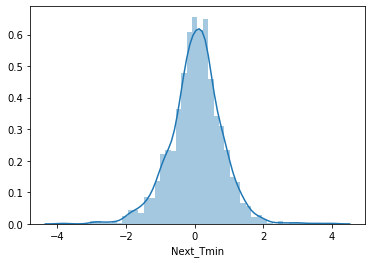

In [19]:
sns.distplot(y_test-rf_model_prediction)

In [20]:
n_cores = 2
number_of_trees = 500 # default = 100
rf = RandomForestRegressor(n_jobs=n_cores, n_estimators=number_of_trees, bootstrap=True) #, verbose=1)

rf.fit(X_train, y_train)
print("Model performance:")
print("RMSE: {}".format(error))
print("R^2-score: {}".format(rf_model.score(X_test, y_test)))

print("Feature importance")
print_RF_featureImportance(rf, X_train)
rf_RD = rf

Model performance:
RMSE: 0.7598385671522728
R^2-score: 0.9073510863175305
Feature importance
Present_Tmax: 0.01661		... 2
Present_Tmin: 0.06189		... 3
LDAPS_RHmin: 0.00933		... 4
LDAPS_RHmax: 0.00821		... 5
LDAPS_Tmax_lapse: 0.00776		... 6
LDAPS_Tmin_lapse: 0.76859		... 7
LDAPS_WS: 0.01368		... 8
LDAPS_LH: 0.00705		... 9
LDAPS_CC1: 0.01198		... 10
LDAPS_CC2: 0.00934		... 11
LDAPS_CC3: 0.01060		... 12
LDAPS_CC4: 0.01284		... 13
LDAPS_PPT1: 0.00530		... 14
LDAPS_PPT2: 0.00444		... 15
LDAPS_PPT3: 0.00293		... 16
LDAPS_PPT4: 0.00424		... 17
lat: 0.00709		... 18
lon: 0.00815		... 19
DEM: 0.00900		... 20
Slope: 0.00750		... 21
Solar radiation: 0.01345		... 22
+------------------+--------+---------+
|     Feature      | Score  | Comment |
+------------------+--------+---------+
|   Present_Tmax   | 0.0166 |    2    |
|   Present_Tmin   | 0.0619 |    3    |
|   LDAPS_RHmin    | 0.0093 |    4    |
|   LDAPS_RHmax    | 0.0082 |    5    |
| LDAPS_Tmax_lapse | 0.0078 |    6    |
| LDAPS_Tmin_lapse

In [21]:
rfRD_prediction = rf_RD.predict(X_test)

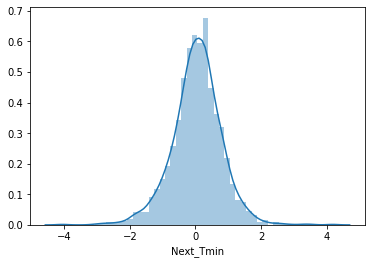

In [22]:
sns.distplot(y_test-rfRD_prediction)

## Optimize Hyperparameters via GridSearch


## Notes on the RandomForestRegressor from scikit-learn
-----
The default values for the parameters controlling the size of the trees
(e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
unpruned trees which can potentially be very large on some data sets. To
reduce memory consumption, the complexity and size of the trees should be
controlled by setting those parameter values.

## Number of variables/features per tree --> 'max_features'

A good starting point is/might be: *the square root of the number of features presented to the tree*. Then, test some values below and above that starting point.

## Number of trees in the forest --> 'n_estimators'

The more the merrier

In [23]:
from numpy import sqrt
num_features = X.shape[1]
print(num_features)
sqrt_num_features = round(sqrt(num_features), 0)
sqrt_num_features

21


5.0

In [24]:
n_cores = 2
# but since we dont have that many features...we are just gonna brute force it :D
param_grid = [
    {
        'n_estimators': [10, 30, 100], 'max_features': [i for i in range(sqrt_num_features-2, sqrt_num_features+2)]
    }
#,{'bootstrap': [False], 'n_estimators': [3, 30, 100, 1000], 'max_features': [2, 3, 4]},
]
k = 10
forest_reg = RandomForestRegressor(n_jobs=n_cores)
grid_search = GridSearchCV(forest_reg, param_grid, n_jobs=n_cores , cv=k, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=2,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [25]:
print_GridSearchResult(grid_search)
grid_search.scorer_
scores = grid_search.score(X_test, y_test)
pred = grid_search.predict(X_test)
error = math.sqrt(metrics.mean_squared_error(y_test, pred))

print("Model performance:")
print("RMSE: {}".format(error))
print("R^2-score: {}".format(grid_search.score(X_test, y_test)))

{'max_features': 7, 'n_estimators': 30}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=2, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Model performance:
RMSE: 0.7369995059796847
R^2-score: -0.5431682718142994


## k-fold cross validation

In [26]:
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

def display_scores(scores):
    print("Scores:", scores)
    table = PrettyTable()
    table.field_names = ['Run', 'Score']
    for i, score in enumerate(scores):
        table.add_row([i, round(score, 3)])
    print(table)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [27]:
k = 5
model = rf_RD
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=k)

In [28]:
display_scores(scores)

Scores: [-1.1007171  -1.31797294 -1.0433619  -1.38351507 -0.85220656]
+-----+--------+
| Run | Score  |
+-----+--------+
|  0  | -1.101 |
|  1  | -1.318 |
|  2  | -1.043 |
|  3  | -1.384 |
|  4  | -0.852 |
+-----+--------+
Mean: -1.1395547146081966
Standard deviation: 0.19218746183622165


# b) Linear regression

In [29]:
df_lin = df_prep_rf

In [30]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Model performance:
RMSE: 0.9818378084004215
R^2-score: 0.8453046823462249


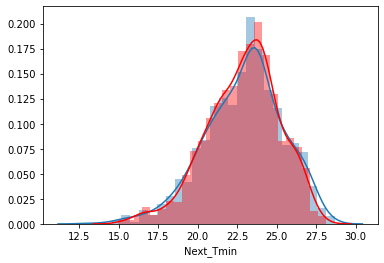

In [31]:
linreg.coef_

pred_linreg = linreg.predict(X_test)
error = math.sqrt(metrics.mean_squared_error(y_test, pred_linreg))

print("Model performance:")
print("RMSE: {}".format(error))
print("R^2-score: {}".format(linreg.score(X_test, y_test)))

sns.distplot(y_test)
sns.distplot(pred, color='red')

# c) Lasso Regression

In [32]:
lasso = Lasso(normalize = True)
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error',cv = 5)

In [33]:
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-1.0771102592532196


In [34]:
y_lasso_pred = lasso_regressor.predict(X_test)

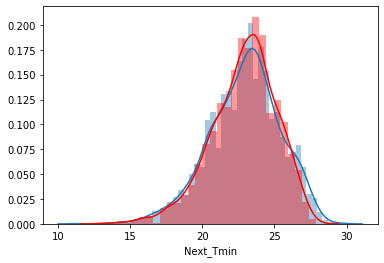

In [35]:
sns.distplot(y_train)
sns.distplot(y_lasso_pred, color='red')

# d) kNN

In [36]:
df_knn = df_prep_rf

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_knn_scaled = scaler.fit_transform(X_train)
X_train_knn = pd.DataFrame(X_train_knn_scaled)

X_test_knn_scaled = scaler.fit_transform(X_test)
X_test_knn = pd.DataFrame(X_test_knn_scaled)

In [37]:
rmse_val_knn = [] # to store rmse values for different k
for k in range(35):
    k = k + 1
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_knn, y_train)
    pred = model.predict(X_test_knn)
    error = sqrt(metrics.mean_squared_error(y_test, pred))
    rmse_val_knn.append(error)
    print("RMSE for k={}: {}".format(k, error))
    print("R^2 for k={}: {}\n".format(k, model.score(X_test_knn, y_test)))

RMSE for k=1: 1.2146435193573817
R^2 for k=1: 0.7632470823882425

RMSE for k=2: 1.0564007464991036
R^2 for k=2: 0.8209167102143056

RMSE for k=3: 0.9821909144270027
R^2 for k=3: 0.8451933937588809

RMSE for k=4: 0.9547631571701589
R^2 for k=4: 0.8537186469346247

RMSE for k=5: 0.9345947103920778
R^2 for k=5: 0.859833476332077

RMSE for k=6: 0.9360556966799545
R^2 for k=6: 0.8593949088396932

RMSE for k=7: 0.9472156584042599
R^2 for k=7: 0.8560222433342335

RMSE for k=8: 0.9611254153855512
R^2 for k=8: 0.8517626003066748

RMSE for k=9: 0.9740188603551524
R^2 for k=9: 0.8477587301454143

RMSE for k=10: 0.9786667939361897
R^2 for k=10: 0.846302299146334

RMSE for k=11: 0.9876002443689836
R^2 for k=11: 0.8434835307344557

RMSE for k=12: 0.9967256704374464
R^2 for k=12: 0.8405777434425437

RMSE for k=13: 1.0091215204360602
R^2 for k=13: 0.836587753308617

RMSE for k=14: 1.0123010834916573
R^2 for k=14: 0.8355563649507283

RMSE for k=15: 1.0197173819124838
R^2 for k=15: 0.833138051942357

RM

Text(0, 0.5, 'RMSE')

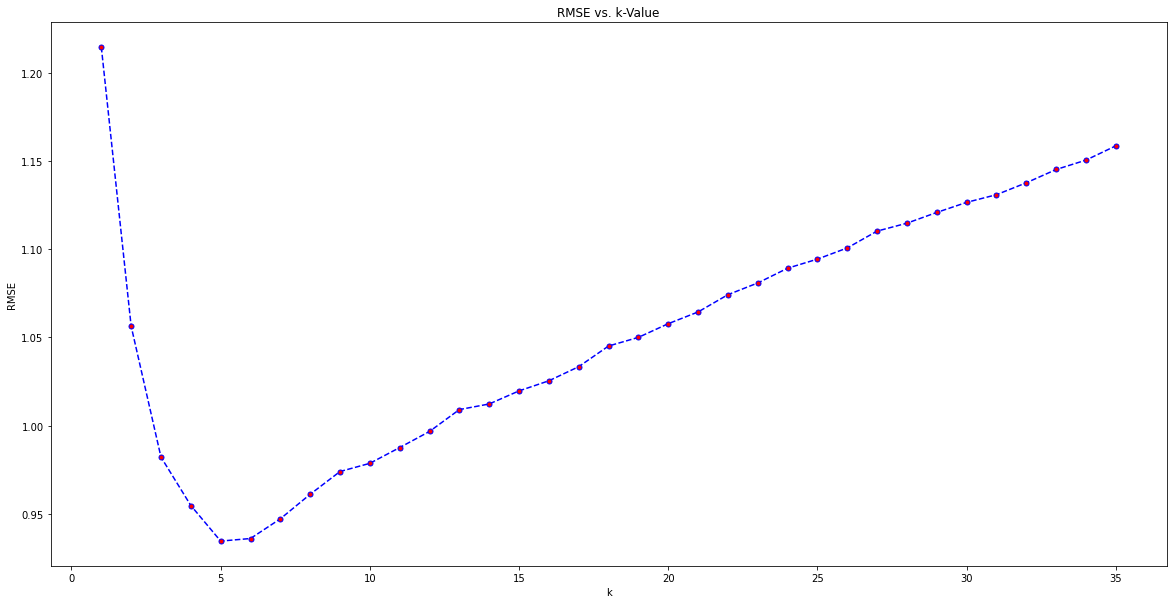

In [38]:
plt.figure(figsize=(20,10))
plt.plot(range(1,36), rmse_val_knn, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=5)
plt.title('RMSE vs. k-Value')
plt.xlabel('k')
plt.ylabel('RMSE')

## Optimizing kNN-search for optimal k-Value via Gridsearch

In [39]:
params = {'n_neighbors': range(1, 35)}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=100)
model.fit(X_train_knn, y_train)
print("Best k-Value is: ", model.best_params_['n_neighbors'])

Best k-Value is:  6


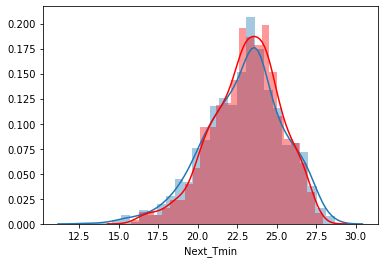

In [40]:
model_cv = KNeighborsRegressor(n_neighbors=model.best_params_['n_neighbors'])
model_cv.fit(X_train_knn, y_train)
pred_cv = model.predict(X_test_knn)
sns.distplot(y_test)
sns.distplot(pred_cv, color='red')